# Dataset: "fake_or_real_news.csv" [Raw Dataset]

Preparing a Naive Bayes Classification Model using the dataset provided.

Task-1: Load and Explore Dataset

Importing necessary libraries

In [84]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

Loading the Dataset

In [85]:
df = pd.read_csv("fake_or_real_news.csv", low_memory=False)

Exploring the Dataset

In [86]:
print("Shape of dataset:", df.shape)

Shape of dataset: (7795, 139)


In [87]:
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

print("\nColumn names:\n", df.columns.tolist())

Rows: 7795
Columns: 139

Column names:
 ['text', 'label', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64', 'Unna

In [88]:
print("\nFirst 5 rows:\n", df.head())


First 5 rows:
   text                                                \
0  Daniel Greenfield, a Shillman Journalism Fello...   
1  Google Pinterest Digg Linkedin Reddit Stumbleu...   
2  U.S. Secretary of State John F. Kerry said Mon...   
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...   
4  It's primary day in New York and front-runners...   

  label  \
0  FAKE   
1  FAKE   
2  REAL   
3  FAKE   
4  REAL   

  Unnamed: 2  \
0  NaN         
1  NaN         
2  NaN         
3  NaN         
4  NaN         

  Unnamed: 3  \
0  NaN         
1  NaN         
2  NaN         
3  NaN         
4  NaN         

  Unnamed: 4  \
0  NaN         
1  NaN         
2  NaN         
3  NaN         
4  NaN         

  Unnamed: 5  \
0  NaN         
1  NaN         
2  NaN         
3  NaN         
4  NaN         

  Unnamed: 6  \
0  NaN         
1  NaN         
2  NaN         
3  NaN         
4  NaN         

  Unnamed: 7  \
0  NaN         
1  NaN         
2  NaN         
3  NaN         
4  NaN         

In [89]:
print("\nDataset Info:\n")
print(df.info())


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7795 entries, 0 to 7794
Columns: 139 entries, text to Unnamed: 138
dtypes: object(139)
memory usage: 8.3+ MB
None


In [90]:
print("\nClass distribution:\n", df['label'].value_counts())


Class distribution:
 label
REAL                                                                                                                                                                   3161
FAKE                                                                                                                                                                   3154
 or naturalization or by jus sanguinis – inherited through ancestors/parents                                                                                              3
 for example                                                                                                                                                              2
 etc.                                                                                                                                                                     2
                                                                                                                

Task-2: Preprocess the data if required (Handle missing values, Encode Categorical Variables, etc.)

Missing Values Detection

In [91]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 text             866
label           1040
Unnamed: 2      7477
Unnamed: 3      7554
Unnamed: 4      7616
                ... 
Unnamed: 134    7794
Unnamed: 135    7794
Unnamed: 136    7794
Unnamed: 137    7794
Unnamed: 138    7794
Length: 139, dtype: int64


Useful columns: text, label. cleaning it up and keeping only the important columns:

In [ ]:
df_clean = df.dropna(axis=1, how='all')

df_clean = df[['text', 'label']]

print("Shape after cleaning:", df_clean.shape)
print("Missing values after cleaning:\n", df_clean.isnull().sum())

Shape after cleaning: (7795, 2)
Missing values after cleaning:
 text      866
label    1040
dtype: int64


Handling Missing Values in Text and Label Columns. Removing rows where text or label is NaN. Keeping a clean dataset ready for preprocessing

In [ ]:
df = df[['text', 'label']]

df = df.dropna(subset=['text', 'label'])

print("Shape after handling missing values:", df.shape)
print("Missing values after cleaning:\n", df.isnull().sum())

Shape after handling missing values: (6754, 2)
Missing values after cleaning:
 text     0
label    0
dtype: int64


Encoding Categorical Variables

In [94]:
# Checking unique text:
df['text'].unique()

array(['Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam. \nIn the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI. \nThe word “unprecedented” has been thrown around so often this election that it ought to be retired. But it’s still unprecedented for the nominee of a major political party to go war with the FBI. \nBut that’s exactly what Hillary and her people have done. Coma patients just waking up now and watching an hour of CNN from their hospital beds would assume that FBI Director James Comey is Hillary’s opponent in this election. \nThe FBI is under attack by everyone from Obama to CNN. Hillary’s people have circulated a letter attacking Comey. There are currently more media hit pieces lambasting him than targeting Trump. It wouldn’t be too surprising if the Clintons or their allies were to start running attack ads against the FBI. \nThe FBI’s leadership is being warned that th

In [95]:
# Checking unique labels:
df['label'].unique()

array(['FAKE', 'REAL', ' filled with fear and insecurity',
       ' by criminal and congressional investigations',
       ' however intimidating the process and long the lines. For Americans who may feel unmoved or unwilling to vote for Mrs. Clinton',
       ' and who better to do it than an outsider beholden to neither political party? If only that reform possibility didn’t arrive as a flawed personality who has few convictions and knows little about the world.”',
       ' Hugh Naylor writes. And the impending assault represents an “intensified international effort” to increase pressure on the extremist group as it loses control of territory in the countries.',
       ' Wesley Lowery and Steven Rich)',
       ' clap and whoop as [KrisAnne] Hall takes the stage in the ballroom of a suburban Minnesota hotel … Hall',
       ' higher spending by the state and wide-scale efforts to lift the working poor. … It is on the ballot in three states: Californians are set to essentially make perman

encoding Label column

In [ ]:
# Encoding labels: FAKE = 1, REAL = 2, all other = 0
def encode_label(label):
    if label == 'FAKE':
        return 1
    elif label == 'REAL':
        return 2
    else:
        return 0

df['encoded_label'] = df['label'].apply(encode_label)

print(df)

     text                                                \
0     Daniel Greenfield, a Shillman Journalism Fello...   
1     Google Pinterest Digg Linkedin Reddit Stumbleu...   
2     U.S. Secretary of State John F. Kerry said Mon...   
3     — Kaydee King (@KaydeeKing) November 9, 2016 T...   
4     It's primary day in New York and front-runners...   
...                                                 ...   
7790  The State Department told the Republican Natio...   
7791  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
7792   Anti-Trump Protesters Are Tools of the Oligar...   
7793  ADDIS ABABA, Ethiopia —President Obama convene...   
7794  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

     label  \
0     FAKE   
1     FAKE   
2     REAL   
3     FAKE   
4     REAL   
...    ...   
7790  REAL   
7791  FAKE   
7792  FAKE   
7793  REAL   
7794  REAL   

      encoded_label  
0     1              
1     1              
2     2              
3     1              
4     2     

Explanation:

"FAKE" → 1

"REAL" → 2

All other values → 0

In [ ]:
missing_values = df.isnull().sum()

print(missing_values)
df.shape
df.head()

text             0
label            0
encoded_label    0
dtype: int64


,text,label,encoded_label
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,1
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,1
2,U.S. Secretary of State John F. Kerry said Mon...,REAL,2
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,1
4,It's primary day in New York and front-runners...,REAL,2


Task-3: Split the data into training & testing sets

In [ ]:
X = df['text']           
y = df['encoded_label']   

# Spliting dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)

Training set: (5403,) (5403,)
Testing set: (1351,) (1351,)


Task-4: Build a Naive Bayes Model using the training data

Importing again necessary libraries

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler 

we will build a Naive Bayes classifier using the training data. Since the data is text, we should use MultinomialNB, which is suitable for text classification.

In [101]:
# Building a pipeline: TF-IDF Vectorizer + Naive Bayes classifier
nb_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_df=0.7)),
    ('nb', MultinomialNB())
])

# Training the model on training data
nb_pipeline.fit(X_train, y_train)

# Making predictions on test data (optional for verification)
y_pred = nb_pipeline.predict(X_test)

# Printing first 10 predictions to check
print(y_pred[:10])

[1 2 2 2 1 2 2 2 1 1]


Explanation:

TfidfVectorizer converts the text into numerical features, ignoring English stop words.

MultinomialNB is used because it works well with word counts/TF-IDF values.

Pipeline allows to combine vectorization and model training in one step.

Task-5: Evaluate the Model's Performance using appropriate metrics(e.g.,Accuracy, Confusion Matrix etc)

In [ ]:
# Handling class imbalance on training data
ros = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ros.fit_resample(X_train.to_frame(), y_train)

# Building TF-IDF + Naive Bayes pipeline
nb_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_df=0.7)),
    ('nb', MultinomialNB())
])

# Training the model on resampled training data
nb_pipeline.fit(X_train_res['text'], y_train_res)

# Making predictions on test data
y_pred = nb_pipeline.predict(X_test)

# Evaluating performance

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Classification Report (with zero_division to avoid warnings)
class_report = classification_report(
    y_test, y_pred, 
    target_names=['FAKE', 'REAL', 'OTHER'], 
    zero_division=0
)
print("\nClassification Report:\n", class_report)

Accuracy: 0.7920059215396003

Confusion Matrix:
 [[ 11  36  41]
 [  4 440 187]
 [  0  13 619]]

Classification Report:
               precision    recall  f1-score   support

        FAKE       0.73      0.12      0.21        88
        REAL       0.90      0.70      0.79       631
       OTHER       0.73      0.98      0.84       632

    accuracy                           0.79      1351
   macro avg       0.79      0.60      0.61      1351
weighted avg       0.81      0.79      0.77      1351



Visualizing Model’s performance

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

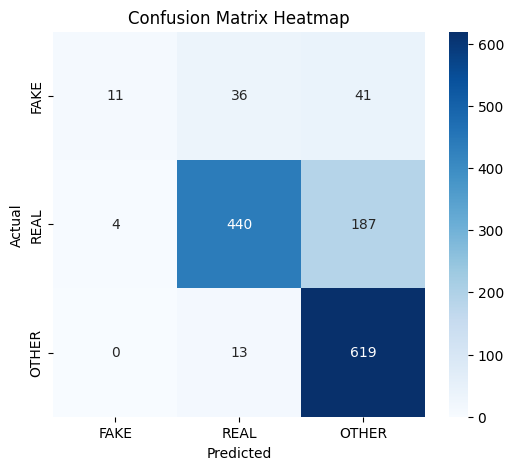

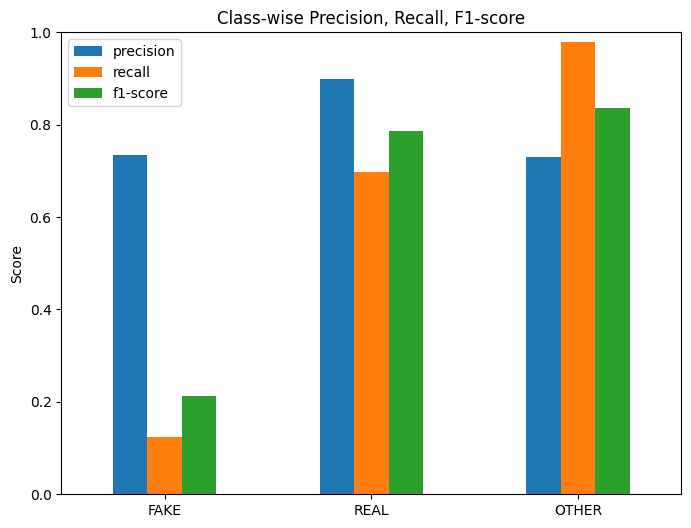

In [104]:
# Confusion Matrix Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['FAKE','REAL','OTHER'], yticklabels=['FAKE','REAL','OTHER'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Bar Plot of Precision, Recall, F1-score
import pandas as pd
report_dict = classification_report(y_test, y_pred, target_names=['FAKE','REAL','OTHER'], output_dict=True)
df_report = pd.DataFrame(report_dict).transpose()

metrics = ['precision', 'recall', 'f1-score']
df_report = df_report.loc[['FAKE','REAL','OTHER'], metrics]

df_report.plot(kind='bar', figsize=(8,6))
plt.title('Class-wise Precision, Recall, F1-score')
plt.ylabel('Score')
plt.ylim(0,1)
plt.xticks(rotation=0)
plt.show()

Task-6: Interpret the results and provide a brief summary of findings

Model Accuracy: The Naive Bayes model achieved an accuracy of ~79%, which indicates that roughly 4 out of 5 predictions were correct on the test set.

Class-wise Performance:

FAKE: Precision = 0.73, Recall = 0.12, F1-score = 0.21
The model predicts some FAKE news correctly when it predicts FAKE (precision is decent), but it misses most actual FAKE news (low recall). This shows difficulty in detecting FAKE news.

REAL: Precision = 0.90, Recall = 0.70, F1-score = 0.79
The model performs well in predicting REAL news with high precision and good recall.

OTHER: Precision = 0.73, Recall = 0.98, F1-score = 0.84
The model identifies OTHER news very well (high recall), though a few predictions are incorrect (precision slightly lower).

Confusion Matrix Insights: The model confuses FAKE news with OTHER and REAL most of the time. REAL and OTHER are predicted more accurately due to larger representation in the dataset.

Overall Summary:
1. The Naive Bayes model works reasonably well for REAL and OTHER labels, but struggles with the minority class FAKE.

2. Improving FAKE detection may require techniques like oversampling the minority class, different feature engineering, or using more advanced models (e.g., Logistic Regression, Random Forest, or deep learning).

3. The plots (confusion matrix and class-wise metrics) visually confirm that FAKE news is under-predicted.

Verifying if there remains any null/missing/Nan values

In [ ]:
print(df.isnull().sum())

print(df.isnull().any())

print(df[df.isnull().any(axis=1)])

text             0
label            0
encoded_label    0
dtype: int64
text             False
label            False
encoded_label    False
dtype: bool
Empty DataFrame
Columns: [text, label, encoded_label]
Index: []


Exporting the csv file after Preprocesssed & Prediction

In [105]:
# Export the DataFrame to a new CSV file
df.to_csv("fake_or_real_news_predicted.csv", index=False)

print("File exported successfully as fake_or_real_news_predicted.csv")

File exported successfully as fake_or_real_news_predicted.csv


# The Naive Bayes model was trained, evaluated, and used to predict news labels successfully.